In [1]:
import pandas as pd
import numpy as np
import os
from openai import OpenAI
import json
import time
import threading

In [2]:
df=pd.read_csv('cldata.csv')



In [3]:
#copy 1000 rows from the dataframe
df1 = df.head(2000)
df=df1

In [4]:
client = OpenAI()

In [16]:
#concat df1 and df2
def output(prompt):
    response = client.chat.completions.create(
        model="ft:gpt-3.5-turbo-1106:devrev-forge::8vOg7kcC",
        messages=[
            {"role": "user", "content": prompt}
        ],
        temperature=1,
        max_tokens=256,
        top_p=1,
        frequency_penalty=0,
        presence_penalty=0
    )
    return response.choices[0].message.content


Exception in thread Thread-5 (thread1):
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\threading.py", line 1038, in _bootstrap_inner
Exception in thread Thread-6 (thread2):
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "c:\ProgramData\anaconda3\Lib\threading.py", line 975, in run
    self.run()
  File "c:\ProgramData\anaconda3\Lib\threading.py", line 975, in run
Exception in thread Thread-7 (thread3):
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\threading.py", line 1038, in _bootstrap_inner
    self._target(*self._args, **self._kwargs)
  File "C:\Users\ravib\AppData\Local\Temp\ipykernel_13476\3512874998.py", line 8, in thread1
    self._target(*self._args, **self._kwargs)
  File "C:\Users\ravib\AppData\Local\Temp\ipykernel_13476\3512874998.py", line 12, in thread2
Exception in thread Thread-8 (thread4):
Traceback (most recent call last):
  Fi

In [42]:
#change lebel to completion and text to prompt
df = df.rename(columns={'completion': 'completion', 'chat': 'prompt'})

In [8]:
#new column sentiment
df

,Unnamed: 0.1,Unnamed: 0,userName,content,at,sentiment
0,0,0,Cassie Moore,"""No words""",2022-11-29 21:55:37,
1,1,1,Kaleb Plummer,"""Great fun app so far!""",2022-11-29 21:55:04,
2,2,2,Rylee Maher,"""The app would get a higher rating but I liter...",2022-11-29 21:54:48,
3,3,3,Kittykatelyn Romilly,"""I WISH I COULD GIVE THIS A 100 PERCENT RATING...",2022-11-29 21:54:35,
4,4,4,Loveness Malenga,"""Pictures and record""",2022-11-29 21:54:21,
...,...,...,...,...,...,...
1995,1995,1995,Rana Ubaid (Jani king),"""Tik tok best app thanks u""",2022-11-29 04:08:23,
1996,1996,1996,Baqir Shamsi,"""Nizamodeen Khan""",2022-11-29 04:08:04,
1997,1997,1997,Dr. Mark S. Hicks,"""The ""CCP""(TikTok)=> Wolves In Sheep's Clothin...",2022-11-29 04:08:03,
1998,1998,1998,Stephen Stephan (Gestampft),"""After updating to Android 13 on Samsung Galax...",2022-11-29 04:07:41,


In [ ]:
#start 2 thereds to fill sentiment column by calling function output(content) for every row

def thread1():
    for i in range(0, 100):
        df['sentiment'][i] = output(df['content'][i])
        print(i)
def thread2():
    for i in range(100, 200):
        df['sentiment'][i] = output(df['content'][i])
        print(i)
def thread3():
    for i in range(200, 300):
        df['sentiment'][i] = output(df['content'][i])
        print(i)
def thread4():
    for i in range(300, 400):
        df['sentiment'][i] = output(df['content'][i])
        print(i)
def thread5():
    for i in range(400, 500):
        df['sentiment'][i] = output(df['content'][i])
        print(i)
def thread6():      
    for i in range(500, 600):
        df['sentiment'][i] = output(df['content'][i])
        print(i)
def thread7():
    for i in range(600, 700):
        df['sentiment'][i] = output(df['content'][i])
        print(i)
def thread8():
    for i in range(700, 800):
        df['sentiment'][i] = output(df['content'][i])
        print(i)
def thread9():
    for i in range(800, 900):
        df['sentiment'][i] = output(df['content'][i])
        print(i)
def thread10():
    for i in range(900, 1000):
        df['sentiment'][i] = output(df['content'][i])
        print(i)
#start 6 threads
t1 = threading.Thread(target=thread1)
t2 = threading.Thread(target=thread2)
t3 = threading.Thread(target=thread3)
t4 = threading.Thread(target=thread4)
t5 = threading.Thread(target=thread5)
t6 = threading.Thread(target=thread6)
t7= threading.Thread(target=thread7)
t8= threading.Thread(target=thread8)
t9= threading.Thread(target=thread9)
t10= threading.Thread(target=thread10)

t1.start()
t2.start()
t3.start()
t4.start()
t5.start()
t6.start()
t7.start()
t8.start()
t9.start()
t10.start()
t1.join()
t2.join()
t3.join()
t4.join()
t5.join()
t7.join()
t6.join()
t8.join()
t9.join()
t10.join()
print(df)

<Axes: xlabel='sentiment'>

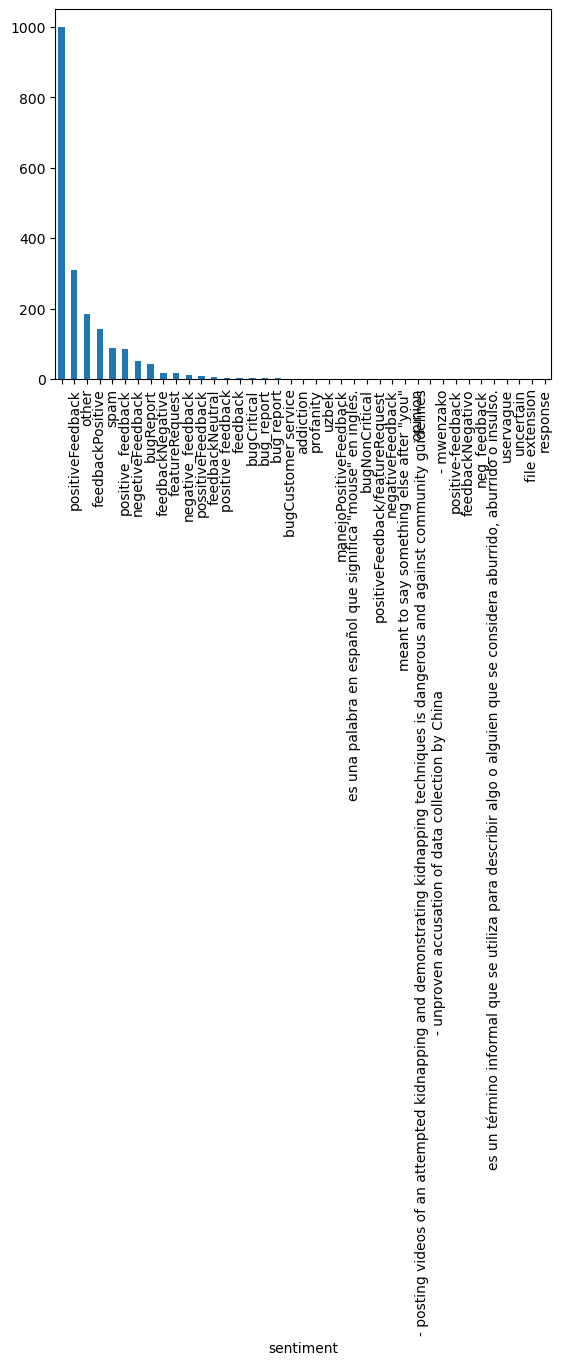

In [18]:
#plot frequency of each sentiment
df['sentiment'].value_counts().plot(kind='bar')


In [1]:
import json

def convert_to_new_format(old_data):
    # Create the new JSON format
    new_data = {
        "messages": [
            {"role": "system", "content": "output can be only spam/possitive_feedback/negetive_feedback/bugReport/bugCritical/bugNonCritical/featureRequest/other."},
            {"role": "user", "content": old_data["prompt"]},
            {"role": "assistant", "content": old_data["completion"]}
        ]
    }
    
    return new_data

def convert_file(input_file, output_file):
    with open(input_file, 'r') as infile, open(output_file, 'w') as outfile:
        for line in infile:
            old_data = json.loads(line.strip())
            new_data = convert_to_new_format(old_data)
            new_line = json.dumps(new_data) + '\n'
            outfile.write(new_line)

# Example usage
input_file = 'validation2.jsonl'
output_file = 'output.jsonl'
convert_file(input_file, output_file)
